Accuracy of Bagging Classifier: 0.885


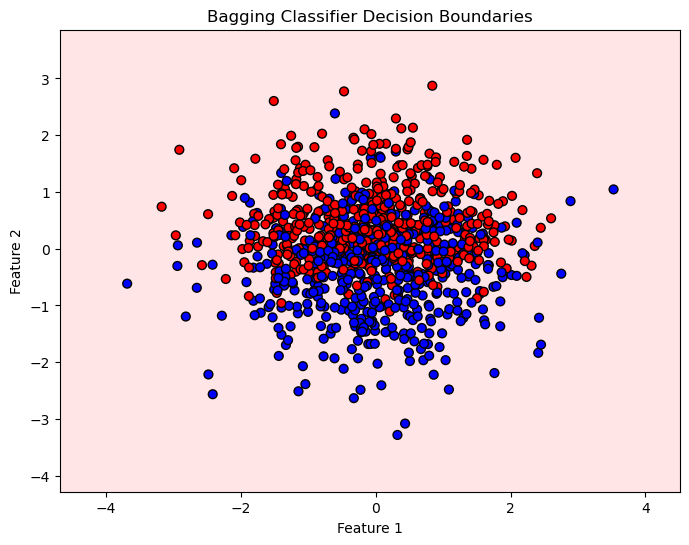

C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:717: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:717: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:717: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\model_selection\_valid

Best Hyperparameters: {'base_estimator__max_depth': 3, 'n_estimators': 15}


In [12]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings

# Set seed for reproducibility
np.random.seed(42)

# Step 2: Synthetic Dataset Generation
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Suppress the FutureWarning about 'base_estimator' parameter
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Step 4: Implement Bagging
    base_model = DecisionTreeClassifier(random_state=42)
    bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=10, random_state=42)

    # Step 5: Train Bagging Model
    bagging_model.fit(X_train, y_train)

    # Step 6: Make Predictions
    y_pred = bagging_model.predict(X_test)

    # Step 7: Evaluate Performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of Bagging Classifier: {accuracy}")

# Continue with the rest of your code...



# Visualize decision boundaries for all features
def plot_decision_boundary(X, y, model, title):
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])

    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Extend meshgrid to use all features
    if X.shape[1] > 2:
        extra_features = np.zeros((xx.size, X.shape[1] - 2))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel(), extra_features])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolors='k', s=40)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
    
    

# Use all features of the synthetic dataset for visualization
plot_decision_boundary(X, y, bagging_model, 'Bagging Classifier Decision Boundaries')




# Step 9: Hyperparameter Tuning
# Example of hyperparameter tuning using grid search
param_grid = {
    'base_estimator__max_depth': [3, 5, 7],
    'n_estimators': [5, 10, 15],
}

grid_search = GridSearchCV(BaggingClassifier(base_model, random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_bagging_model = grid_search.best_estimator_

# Step 10: Documentation and Reporting
# Print the best hyperparameters found during the grid search
print("Best Hyperparameters:", grid_search.best_params_)


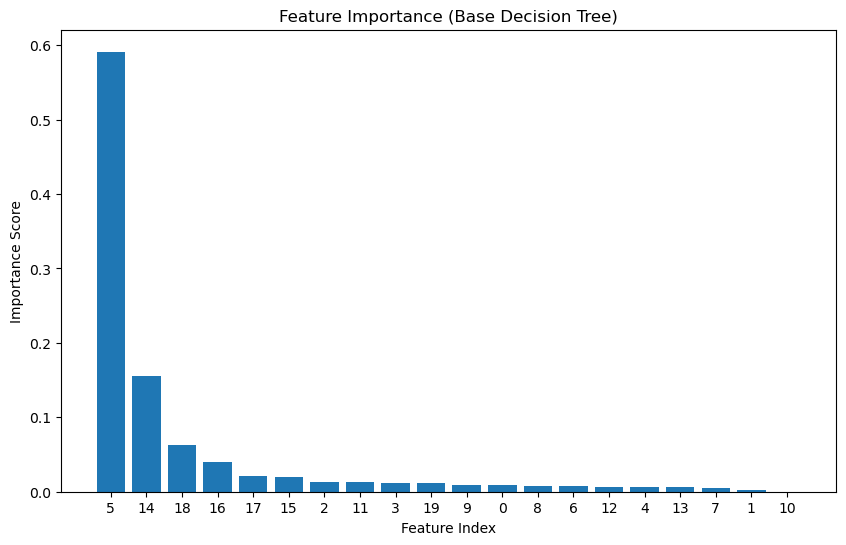

In [15]:
# Visualizing Feature Importance
base_model.fit(X_train, y_train)  # Fit the base decision tree
feature_importance = base_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), sorted_idx)
plt.title("Feature Importance (Base Decision Tree)")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()


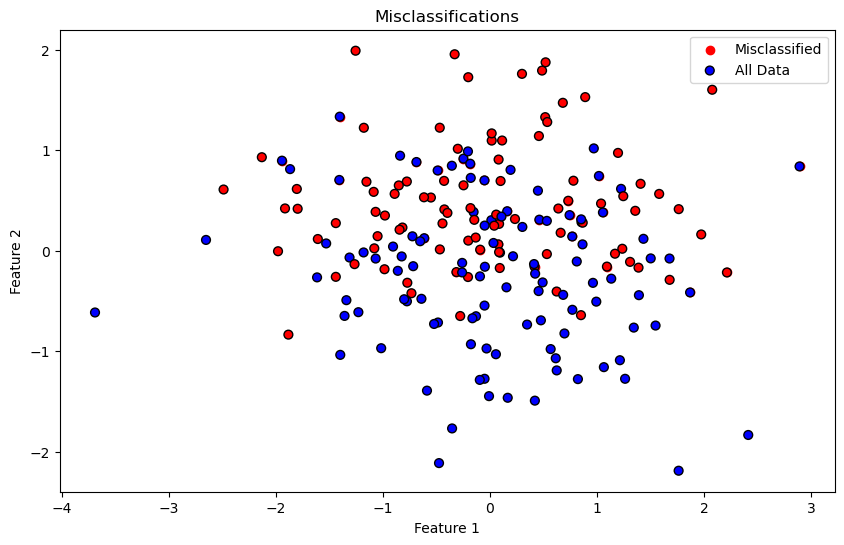

In [17]:
# Analyzing Misclassifications
cmap_points = ListedColormap(['#FF0000', '#0000FF'])  # Define cmap_points

misclassified_indices = np.where(y_test != best_bagging_model.predict(X_test))[0]

plt.figure(figsize=(10, 6))
plt.scatter(X_test[misclassified_indices, 0], X_test[misclassified_indices, 1], marker='o', c='r', label='Misclassified')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, edgecolors='k', cmap=cmap_points, s=40, label='All Data')
plt.title("Misclassifications")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


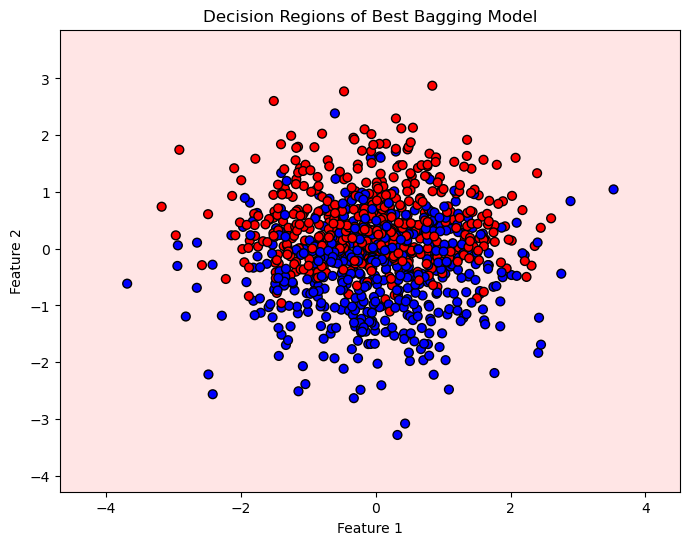

In [19]:
# Visualization of Decision Regions for Best Bagging Model
def plot_decision_regions(X, y, model, title):
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])

    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Extend meshgrid to use all features
    extra_features = np.zeros((xx.size, X.shape[1] - 2))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), extra_features])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolors='k', s=40)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Use all features of the synthetic dataset for visualization
plot_decision_regions(X, y, best_bagging_model, 'Decision Regions of Best Bagging Model')


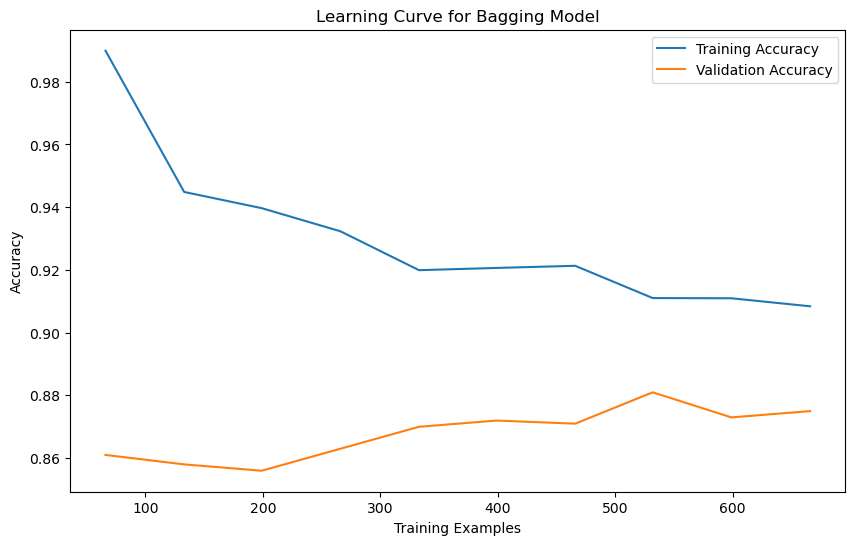

In [20]:
# Learning Curve for Bagging Model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_bagging_model, X, y, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.title('Learning Curve for Bagging Model')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
